<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/Total_Preferred_Capital_Raised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

# Load data

In [35]:
path1 = 'https://raw.githubusercontent.com/Carloszone/ALY-6080/main/NE%20%20VC%20Backed%20Exits%20DevOps%20(VC%20Exits).csv'
path2 = 'https://raw.githubusercontent.com/Carloszone/ALY-6080/main/NE%20%20VC%20Backed%20Exits%20DevOps%20(return%20by%20series).csv'
path3 = 'https://raw.githubusercontent.com/Carloszone/ALY-6080/main/NE%20Devops%20dataset%20all-fields.csv'

df_vc = pd.read_csv(path1)
df_return = pd.read_csv(path2)
df_all = pd.read_csv(path3)

In [36]:
# rename the CompanyID in df_all
df_all = df_all.rename(columns={"Company ID": "Company PBID"})

# Pre-processing

In [37]:
# remove all NA in column Company PBID
df_vc = df_vc.dropna(subset = ['Company PBID'])
df_return = df_return.dropna(subset = ['Company PBID'])
df_all = df_all.dropna(subset = ['Company PBID'])

In [38]:
# remove the addiditonal signal for all availiavle values in df_vc
df_vc['MOIC'][df_vc['MOIC'].notna()] = df_vc['MOIC'][df_vc['MOIC'].notna()].str.replace("x","")
df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()] = df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()].str.replace("$","")
df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()] = df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()].str.replace("$","")
df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()] = df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()].str.replace("$","")
df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()] = df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()].str.replace("$","")
df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()] = df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()].str.replace("$","")
df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()] = df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()].str.replace("$","")

df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()] = df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()].str.replace(",","")
df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()] = df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()].str.replace(",","")
df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()] = df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()].str.replace(",","")
df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()] = df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()].str.replace(",","")
df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()] = df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()].str.replace(",","")
df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()] = df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()].str.replace(",","")

df_vc['% Preferred Capital Raised*'][df_vc['% Preferred Capital Raised*'].notna()] = df_vc['% Preferred Capital Raised*'][df_vc['% Preferred Capital Raised*'].notna()].str.replace("%","")
df_vc['% Preferred Capital Raised - Combination**'][df_vc['% Preferred Capital Raised - Combination**'].notna()] = df_vc['% Preferred Capital Raised - Combination**'][df_vc['% Preferred Capital Raised - Combination**'].notna()].str.replace("%","")

In [39]:
# # remove the addiditonal signal for all availiavle values in df_all
df_all['Raised to Date'] = df_all['Raised to Date'].str.replace(",","")
df_all['Current Employees'] = df_all['Current Employees'].str.replace(",","")

In [40]:
# transform data type in df_vc
df_vc.loc[:,'Exit Size (millions)'] = df_vc.loc[:,'Exit Size (millions)'].astype(float)
df_vc.loc[:,'Pre Value (millions)'] = df_vc.loc[:,'Pre Value (millions)'].astype(float)
df_vc.loc[:,'Post Value (millions)'] = df_vc.loc[:,'Post Value (millions)'].astype(float)
df_vc.loc[:,'Total VC Capital Raised ($M)***'] = df_vc.loc[:,'Total VC Capital Raised ($M)***'].astype(float)
df_vc.loc[:,'Total Preferred Capital Raised ($M)*'] = df_vc.loc[:,'Total Preferred Capital Raised ($M)*'].astype(float)
df_vc.loc[:,'% Preferred Capital Raised*'] = df_vc.loc[:,'% Preferred Capital Raised*'].astype(float)
df_vc.loc[:,'Total Preferred Capital Raised ($M) - Combination**'] = df_vc.loc[:,'Total Preferred Capital Raised ($M) - Combination**'].astype(float)
df_vc.loc[:,'% Preferred Capital Raised - Combination**'] = df_vc.loc[:,'% Preferred Capital Raised - Combination**'].astype(float)
df_vc.loc[:,'MOIC'] = df_vc.loc[:,'MOIC'].astype(float)

# transform data type in df_all
df_all.loc[:,'Raised to Date'] = df_all.loc[:,'Raised to Date'].astype(float)
df_all.loc[:,'Current Employees'] = df_all.loc[:,'Current Employees'].astype(float)

# Merge datasets and create a new df

In [41]:
# merge dataset
df = df_all.merge(df_vc.loc[df_vc['Total VC Capital Raised ($M)***'].notna(),:], how = 'inner', on = 'Company PBID')

In [42]:
# set Total VC Capital Raised as the first columns
newcol = df['Total VC Capital Raised ($M)***']
df = df.drop('Total VC Capital Raised ($M)***', axis = 1)
df.insert(loc=0, column='Total VC Capital Raised ($M)***', value=newcol)

In [43]:
# locate and drop all columns that missing value percent >30%
# check missing value in df
missing = df.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / df.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])

In [44]:
# drop all columns that missing value percent is over 30%
df = df.drop(over30, axis = 1)

In [45]:
# based on unqie value table, drop columns
droplist = ['Deal ID', 'Company PBID', 'Primary Industry Code', 'All Industries', 'Keywords', 
            'CEO PBId', 'Deal ID.1', 'Deal Status', 'HQ Location', 'Company City','Company State/Province', 
            'Company Post Code', 'Industry Code', 'Verticals_y', 'City', 'State', 'VC Round', 'Financing Status']

# drop columns
df = df.drop(droplist, axis = 1)

# Fill missing values

In [46]:
# check missing value in df
missing = df.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / df.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
# New Investors,58,20.567376
Total Invested Equity,56,19.858156
CEO Education,52,18.439716
Deal Size Status,45,15.957447
Deal Size,43,15.248227
# Investors,37,13.120567
Current Employees,35,12.411348
Raised to Date,9,3.191489
Year Founded,5,1.773050


In [47]:
# fill missing values

df['# New Investors'] = df['# New Investors'].fillna(int(df['# New Investors'].mean()))
df['Total Invested Equity'] = df['Total Invested Equity'].fillna(df['Total Invested Equity'].mean())
df['CEO Education'] = df['CEO Education'].fillna('O')
df['Deal Size Status'] = df['Deal Size Status'].fillna('Missing')
df['Deal Size'] = df['Deal Size'].fillna(df['Deal Size'].mean())
df['# Investors'] = df['# Investors'].fillna(int(df['# Investors'].mean()))
df['Current Employees'] = df['Current Employees'].fillna(int(df['Current Employees'].mean()))
df['Raised to Date'] = df['Raised to Date'].fillna(df['Raised to Date'].mean())
df['Year Founded'] = df['Year Founded'].fillna(2013)

# Features transform

In [48]:
#transform "Deal Date"
df['Deal Date'] = df['Deal Date'].str.extract(pat='([0-9]+$)')
df.loc[:,'Deal Date'] = df.loc[:,'Deal Date'].astype(float)
#transform "Exit Date"
df['Exit Date'] = df['Exit Date'].str.extract(pat='^([0-9]+)')

df['CompanyAge'] = 2021 - df['Year Founded']

In [49]:
df.head()

,Total VC Capital Raised ($M)***,Primary Industry Sector,Primary Industry Group,Verticals_x,Current Financing Status,Current Business Status,Universe,CEO Education,Deal No.,Deal Date,Deal Size,Deal Size Status,Raised to Date,Deal Type,Deal Class,Total Invested Equity,Business Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Global Region,HQ Global Sub Region,Company Country,Year Founded,Exit Date,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Country,CompanyAge
0,0.70,Information Technology,Software,"CloudTech & DevOps, SaaS, TMT",Formerly VC-backed,Generating Revenue,Venture Capital,"BA (Bachelor of Arts), 2005, Business & Marketing",1,2016.0,0.7,Actual,0.70,Early Stage VC,Venture Capital,0.7,Product In Beta Test,2.0,2.0,4.0,US Dollars (USD),Middle East,Middle East,Israel,2015.0,2017,Merger/Acquisition,Early Stage VC,Information Technology,Software,Israel,6.0
1,10.10,Information Technology,Software,"CloudTech & DevOps, SaaS",Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",1,2015.0,10.1,Actual,10.10,Early Stage VC,Venture Capital,10.1,Generating Revenue,1.0,1.0,6.0,US Dollars (USD),Americas,North America,United States,2013.0,2019,Merger/Acquisition,Early Stage VC,Information Technology,Software,United States,8.0
2,2.00,Information Technology,Software,"Artificial Intelligence & Machine Learning, Cl...",Formerly VC-backed,Startup,Venture Capital,"MS (Master of Science), 2005, Computer Science",1,2016.0,2.0,Actual,2.00,Seed Round,Venture Capital,2.0,Startup,2.0,2.0,50.0,US Dollars (USD),Europe,Eastern Europe,Belarus,2016.0,2017,Merger/Acquisition,Seed Round,Information Technology,Software,Belarus,5.0
3,1.15,Business Products and Services (B2B),Commercial Services,"CloudTech & DevOps, Marketing Tech, Mobile, Sa...",Formerly VC-backed,Product Development,Venture Capital,"University of California, Berkeley, BS (Bachel...",5,2015.0,1.0,Actual,1.15,Seed Round,Venture Capital,1.0,Product Development,2.0,1.0,6.0,US Dollars (USD),Americas,North America,United States,2012.0,2015,Merger/Acquisition,Seed Round,Business Products and Services (B2B),Commercial Services,United States,9.0
4,68.24,Information Technology,Software,"CloudTech & DevOps, Cybersecurity, SaaS, TMT",Private Equity-Backed,Profitable,"Debt Financed, Private Equity, Venture Capital","Michigan State University, BS (Bachelor of Sci...",9,2016.0,3.5,Actual,78.23,Later Stage VC,Venture Capital,3.5,Generating Revenue,4.0,2.0,117.0,US Dollars (USD),Americas,North America,United States,2001.0,2016,Buyout/LBO,Series H,Information Technology,Software,United States,20.0


# EDA

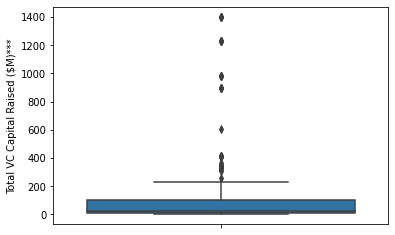

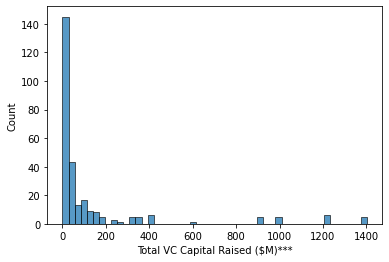

In [50]:
# check MOIC's distribution
sn.boxplot(y=df["Total VC Capital Raised ($M)***"])
plt.show()
sn.histplot(df, x ='Total VC Capital Raised ($M)***')
plt.show()

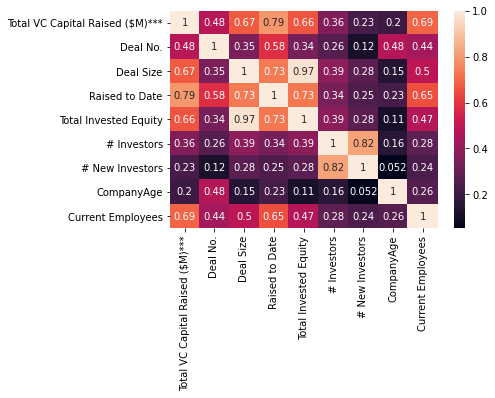

In [51]:
# create correlation metrix
corrMatrix = df.loc[:,['Total VC Capital Raised ($M)***', 'Deal No.', 'Deal Size', 'Raised to Date', 'Total Invested Equity', '# Investors', 
                       '# New Investors', 'CompanyAge', 'Current Employees']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [52]:
df.columns

Index(['Total VC Capital Raised ($M)***', 'Primary Industry Sector',
       'Primary Industry Group', 'Verticals_x', 'Current Financing Status',
       'Current Business Status', 'Universe', 'CEO Education', 'Deal No.',
       'Deal Date', 'Deal Size', 'Deal Size Status', 'Raised to Date',
       'Deal Type', 'Deal Class', 'Total Invested Equity', 'Business Status',
       '# Investors', '# New Investors', 'Current Employees',
       'Native Currency of Deal', 'HQ Global Region', 'HQ Global Sub Region',
       'Company Country', 'Year Founded', 'Exit Date', 'Exit Type',
       'Last VC Deal Type', 'Industry Sector', 'Industry Group', 'Country',
       'CompanyAge'],
      dtype='object')

# Feature engineering

In [53]:
def generate_features(data):
    le= LabelEncoder()
    data = data.loc[:,['Total VC Capital Raised ($M)***', 'Primary Industry Sector', 'Current Employees', 'Country', 'CompanyAge', 'Last VC Deal Type',
                                    'Raised to Date', "Primary Industry Group"]]
    data['Primary Industry Sector'] = le.fit_transform(data['Primary Industry Sector'])
    data['Last VC Deal Type'] = le.fit_transform(data['Last VC Deal Type'])
    data['Country'] = le.fit_transform(data['Country'])
    data['Primary Industry Group'] = le.fit_transform(data['Primary Industry Group'])
    return(data)

In [54]:
df2 = generate_features(df)

In [55]:
def error(y_true, y_pred):
    pred_err_squared = mean_squared_error(y_true,y_pred,squared = 1, multioutput = 'raw_values')
    total_err_squared = (y_true - np.mean(y_true)) ** 2
    return(np.sqrt(np.sum(pred_err_squared)/np.sum(total_err_squared))*100)

In [56]:
def scores(model_list,train_x, train_y, test_x, test_y):
    model_names = []
    train_score = []
    model_score = []
    train_mse = []
    model_mse = []
    train_mae = []
    model_mae = []
    train_error = []
    test_error = []
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    test_x = np.array(test_x)
    test_y = np.array(test_y)

    for model in model_list:
        model.fit(train_x, train_y)
        model_names.append(model)
        train_score.append(model.score(train_x, train_y))
        model_score.append(model.score(test_x, test_y))
        train_mse.append(mean_squared_error(train_y,model.predict(train_x),squared = 1))
        model_mse.append(mean_squared_error(test_y,model.predict(test_x),squared = 1))
        train_mae.append(mean_absolute_error(train_y, model.predict(train_x)))
        model_mae.append(mean_absolute_error(test_y, model.predict(test_x)))
        train_error.append(error(train_y,model.predict(train_x)))
        test_error.append(error(test_y,model.predict(test_x)))
    result = pd.DataFrame({'Name':model_names, 'Train_R^2': train_score, 'Test_R^2':model_score, 'Train_RMSE':train_mse,
                           'Test_RMSE':model_mse, 'Train_MAE':train_mae, 'Test_MAE':model_mae, 'Train_ERR':train_error,
                          'Test_ERR':test_error})
    return result

# Split dataset

In [57]:
X = df2.iloc[:, 1:]
Y = df2.iloc[:, 0:1]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2021)

# Model selection

In [59]:
#def grid_search(x, y, model, parameters, cv):
#    x = np.array(x)
#    y = np.array(y)
#    
#    search_rf = GridSearchCV(estimator = model,
#                             param_grid = parameters, 
#                             cv = cv,
#                             n_jobs = -1,
#                             verbose = 2)
#    search_rf.fit(x, y)
#    grid_result = search_rf.best_params_
#    return  grid_result  

In [60]:
# build model with the best parameters
model_lr = LinearRegression()
model_ridge = Ridge(solver = 'sparse_cg')
model_xgb = XGBRegressor(booster = 'gbtree', n_estimators= 6, max_depth = 4, random_state = 2021)
model_lasso = Lasso(random_state = 2021)
model_en = ElasticNet()
model_rf = RandomForestRegressor(n_estimators = 100, max_features = 2, random_state = 2021)

In [61]:
# grid search for xgb
#grid_xgb = {
#    'booster':['gbtree'],
#    'n_estimators':[3, 5, 7],
#    'objective':['reg:linear'],
#    'learning_rate': [.01, .03, .05, .07], 
#    'max_depth': [3, 5, 7],
#    'min_child_weight': [1,3,5],
#    'verbosity': [0],
#    'subsample': [0.7,0.8],
#    'colsample_bytree': [0.8],
#    'random_state':[2021]
#}

#best_xgb = grid_search(X_train, y_train, model_xgb, grid_xgb, cv= 5)

In [62]:
#grid search for randomforest
#grid_rf = {
#    'n_estimators': [50,100,200,500],
#    'min_samples_split':[2,4,6,8],
#    'min_samples_leaf': [2,4,6],
#    'max_depth': [1,3,5],
#    'max_features': [2,3,4],
#    'random_state': [9527]
#}

# best_rf = grid_search(X_train, y_train, model_rf, grid_rf, cv= 5)

In [63]:
# build model with the best parameter
# model_xgb = XGBRegressor(**best_xgb)
# model_rf = RandomForestRegressor(**best_rf)

In [64]:
model_list = [model_lr, model_ridge, model_xgb, model_lasso, model_en, model_rf]
scores(model_list, X_train, y_train, X_test, y_test)

[01:37:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Name,Train_R^2,Test_R^2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_ERR,Test_ERR
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.682437,0.725427,27503.347728,29635.057273,72.200319,72.745904,3.756851,6.940515
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.672655,0.709816,28350.532605,31319.936121,65.161201,65.530896,3.814273,7.135087
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.597034,0.573137,34899.855366,46071.936049,77.991697,97.520855,4.231974,8.653804
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.682430,0.725408,27503.945854,29637.044159,72.119468,72.480423,3.756892,6.940748
4,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",0.682421,0.725246,27504.702295,29654.536473,71.870573,72.211405,3.756943,6.942796
5,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.980826,0.933764,1660.588200,7148.950359,15.225692,34.674191,0.923128,3.408866


In [65]:
train_x = np.array(X_train)
train_y = np.array(y_train)
model = model_rf.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
pd.DataFrame({
    'features': X.columns,
    'importance': model.feature_importances_
}).sort_values(by=['importance'],ascending=False).reset_index(drop = True)

,features,importance
0,Current Employees,0.427904
1,Raised to Date,0.356034
2,Last VC Deal Type,0.109248
3,CompanyAge,0.092217
4,Country,0.011615
5,Primary Industry Group,0.002796
6,Primary Industry Sector,0.000185
